# 卷积神经元网络CNN (Convolutional Neural Network)

一张图片旋转了之后,可能就无法正常识别了。

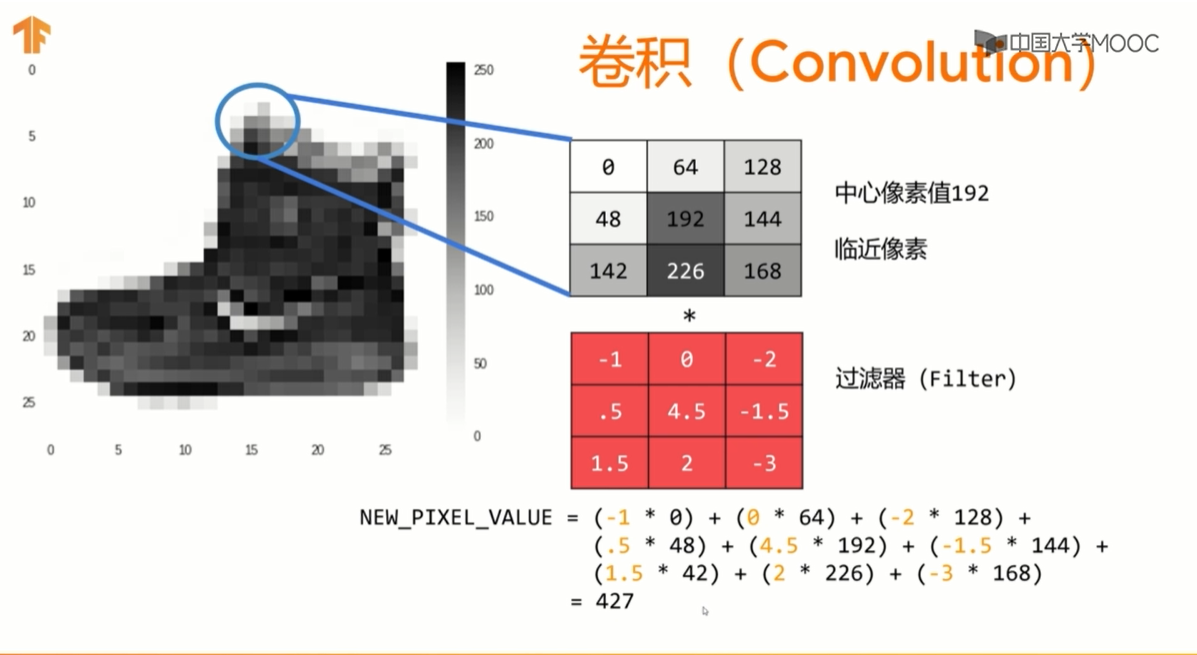

先从图像中取9个像素,卷积则是过滤器与这9个像素的运算。
完整的运算就是从左上角开始, 依次选取中心像素进行运算,直至最后一个中心像素。

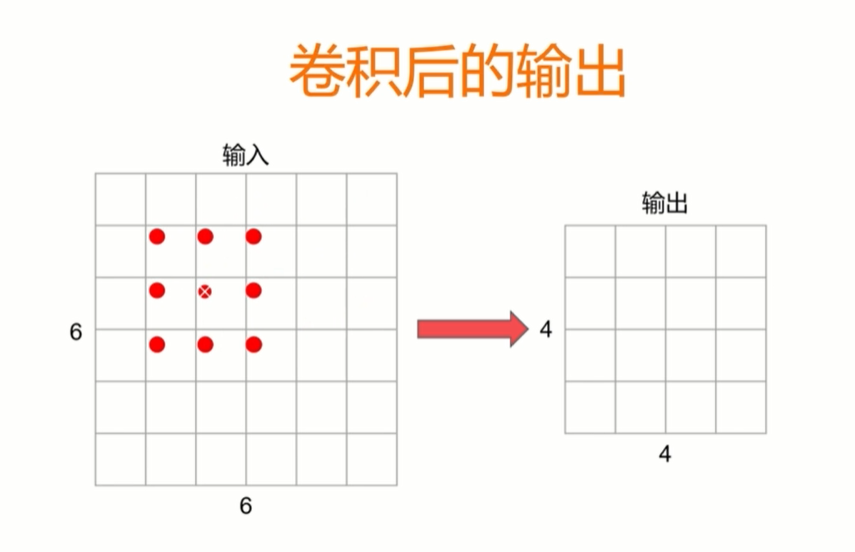
图例中的"过滤器"为 3x3 的,样本为 6x6的, 则最终输出为 4x4 的矩阵.

* 不同过滤器效果不同
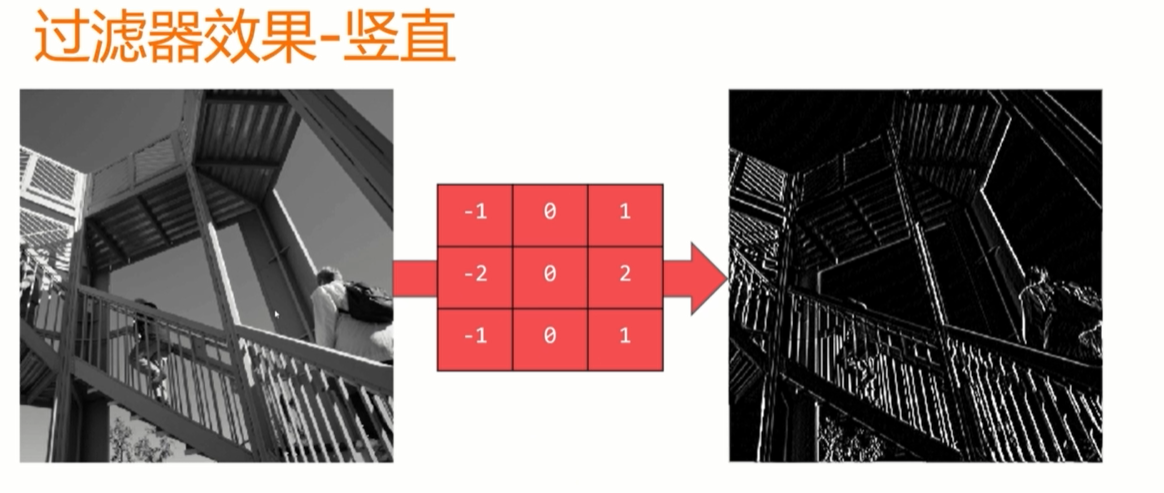
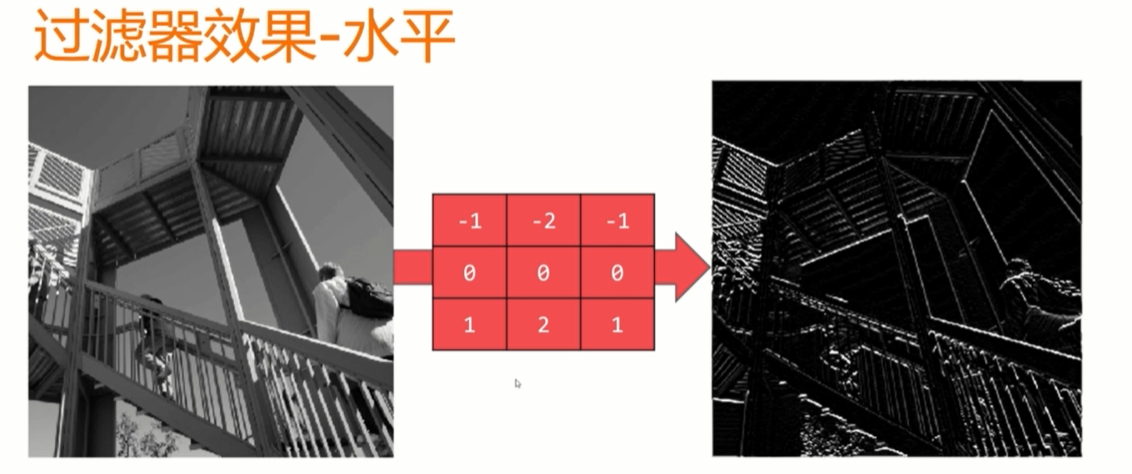

* Max Pooling
保留每个区域的最大特征
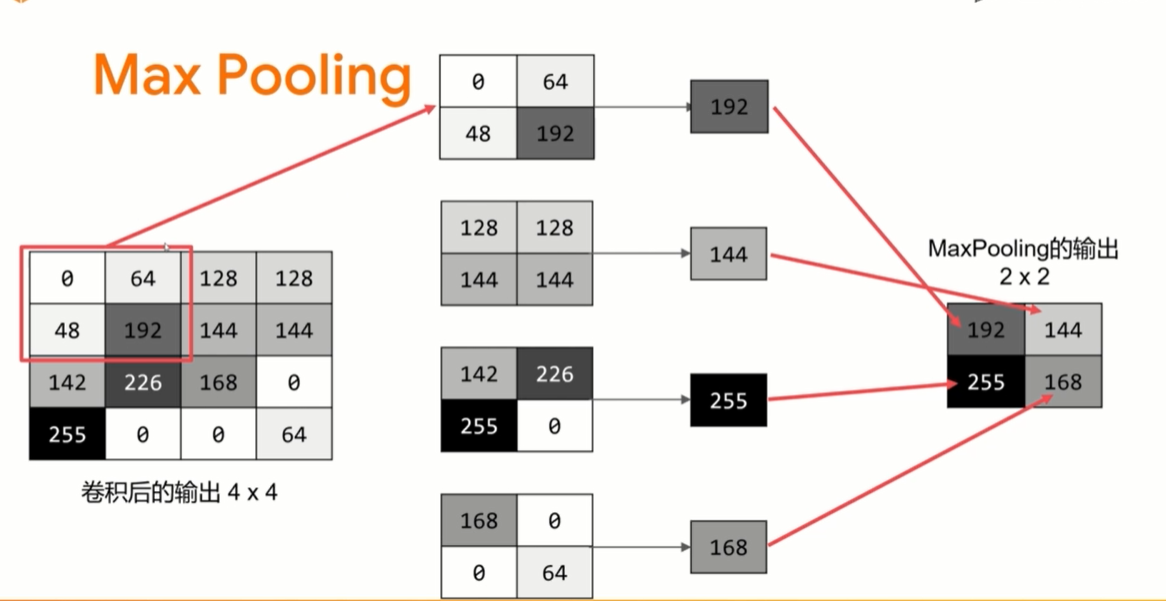

可以达到增强特征,减少数据的效果
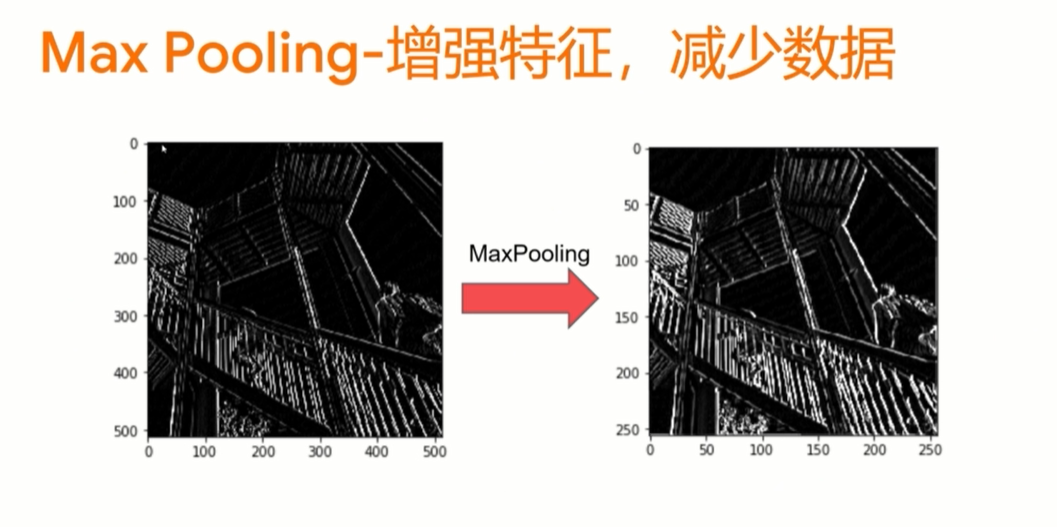

卷积与图像的一些知识:https://bit.ly/2UGa7uH


====

# 卷积网络程序

接下来基于之前的全连接神经网络的code继续, 可以观察到在训练过程中 Loss 不断减小, accuracy在不断提高,训练效果是比之前的要好,但是花费的时间也相对多。

In [3]:
import tensorflow as tf
from tensorflow import keras

# load image datas used for trainning
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

model = keras.Sequential()

# 设置64个filter, 且尺寸3x3, 激活函数 relu, 输入图形的size 28x28并且1个通道灰度
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(keras.layers.MaxPooling2D(2, 2))

model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2, 2))

model.add(keras.layers.Flatten())
#中间层:128个神经元, 并指定 激活函数为 relu()
model.add(keras.layers.Dense(128, activation = tf.nn.relu))
#输出层:10个类别(神经元), 并指定激活函数为 softmax()
model.add(keras.layers.Dense(10, activation = tf.nn.softmax))

# train
# 使 train data 转化为 0~1 之间的数据, 有助于提高训练效果
train_images=train_images/255

# 指定 优化方法  loss_function  并显示精度
# adam 优化方法是很常用的, 尤其当输出结果是类别 类别判断
# sparse_categorical_crossentropy or categorical_crossentropy
# train_labels[0] 这种 只有整数的  train_data, 并且只有一个数据是1, 另特别称为 one-hot,类别为1
#model.compile(optimizer='adam', loss=tf.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
model.compile(optimizer=tf.optimizers.Adam(), loss=tf.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

# start trainning, 5 times
model.fit(train_images.reshape(-1, 28, 28, 1), train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 53s 889us/sample - loss: 0.4387 - accuracy: 0.8399
Epoch 2/5
60000/60000 [==============================] - 54s 893us/sample - loss: 0.2912 - accuracy: 0.8919
Epoch 3/5
60000/60000 [==============================] - 54s 895us/sample - loss: 0.2463 - accuracy: 0.9086
Epoch 4/5
60000/60000 [==============================] - 54s 906us/sample - loss: 0.2133 - accuracy: 0.9191
Epoch 5/5
60000/60000 [==============================] - 54s 897us/sample - loss: 0.1875 - accuracy: 0.9286


# 卷积网络结构



In [23]:
import matplotlib.pyplot as plt
#取出model的每个 layer
layer_outputs = [layer.output for layer in model.layers]

#input & output 构成一个模型
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

#基于该模型 预测 一张图片
pred = activation_model.predict(test_images[0].reshape(1, 28, 28, 1))

pred

[array([[[[0.        , 0.        , 0.00429468, ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.        , 0.00429468, ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.        , 0.00429468, ..., 0.        ,
           0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.00429468, ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.        , 0.00429468, ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.        , 0.00429468, ..., 0.        ,
           0.        , 0.        ]],
 
         [[0.        , 0.        , 0.00429468, ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.        , 0.00429468, ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.        , 0.00429468, ..., 0.        ,
           0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.00429468, ..., 0.        ,
   

In [14]:
len(pred)

7

In [15]:
pred[0].shape

(1, 26, 26, 64)

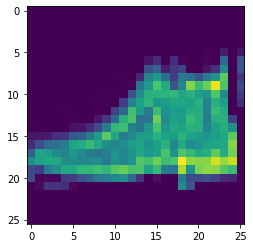

In [24]:
# 利用python的slide, 基于filter 1, show
plt.imshow(pred[0][0,:,:,1])

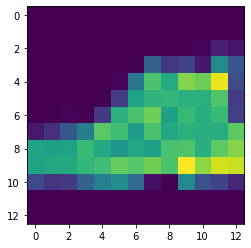

In [25]:
# MaxPooling
plt.imshow(pred[1][0,:,:,1])

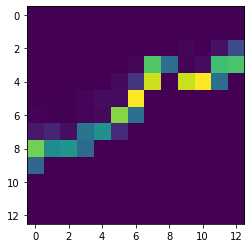

In [26]:
# 基于filter 2
plt.imshow(pred[1][0,:,:,2])